In [4]:
include("definitions.jl")
include("controls.jl")
include("qube_simulator.jl")

using PyPlot

In [49]:
function plot_results(hists, labels=Nothing, colors=Nothing)
    state_dims = ["Theta", "Alpha", "Theta dot", "Alpha dot"]
    n_axes = length(state_dims)
    
    f, fig_axes = plt.subplots(n_axes, 1, sharex=true)
    for (i, ax) in enumerate(fig_axes)
        if labels == Nothing
            for hist in hists
                ax.plot(hist[:,i])
            end
        else
            if colors == Nothing
                for (hist, label) in zip(hists, labels)
                    ax.plot(hist[:,i], label=label)
                end
            else
                for (hist, label, color) in zip(hists, labels, colors)
                    ax.plot(hist[:,i], label=label, color=color)
                end
            end
        end
        ax.set_ylabel(state_dims[i])
#         ax.legend()
    end
    plt.show()
end

plot_results (generic function with 3 methods)

In [50]:
function run_sim(init_state; nsteps=5000, plot=false, verbose=false)
    
    θ, α, θ̇, α̇ = init_state
    Vm = 0.0
    dt = 1.0 / 1000
    i_step = 3

    state_hist = Matrix{Float64}(undef, nsteps, 4)
    p = SampledPhysicalParameters()
#     p = PhysicalParameters()
    println(p)
    println()

    for t in 1:nsteps
        a = flip_and_hold_policy([θ, α, θ̇, α̇])[1]
        θ, α, θ̇, α̇ = forward_model_euler(θ, α, θ̇, α̇, a, dt, p, i_step)
        state_hist[t,:] .= θ, α, θ̇, α̇
    end

    return state_hist

end

run_sim (generic function with 1 method)

| Rm | kt | km | mr | Lr | Jr | Dr | mp | Lp | Jp | Dp | g |
|-|-|-|-|-|-|-|-|-|-|-|-|
|9.139 | 0.0470 | 0.0439 | 0.0991 | 0.0775 | 4.972e-5 | 0.00028 |  0.0225 | 0.1364 | 3.4951e-5 | 4.473e-5 | 8.5906 |
|7.617 | 0.0479 | 0.0384 | 0.0939 | 0.0684 | 3.670e-5 | 0.00025 |  0.0250 | 0.1424 | 4.2394e-5 | 5.893e-5 | 10.268 |

In [63]:
init_state = 0.04 * rand(4)
println(init_state)
init_state[2] += π

n = 10
hists = [run_sim(init_state)]

for i in 1:n
    push!(hists, run_sim(init_state))
end

[0.0142668, 0.0248421, 0.0248872, 0.0206294]
PhysicalParameters(7.9084378928081325, 0.0430476182586454, 0.045749702157239544, 0.0855000211200784, 0.09112396957846018, 5.9163006665471204e-5, 0.00028223304012806917, 0.02467109053373698, 0.128862395188361, 3.413968422029258e-5, 5.40842559226117e-5, 9.332246939694299)

PhysicalParameters(7.829062378285555, 0.04314507850286806, 0.04425402462600438, 0.0957529940953921, 0.08024641834283072, 5.138335196532977e-5, 0.00026558713797235583, 0.02378290933425011, 0.12418878711122397, 3.056669653615699e-5, 4.911349422138229e-5, 9.784798692636226)

PhysicalParameters(8.910153167864072, 0.04068326348883546, 0.04280291822821294, 0.08594181966056924, 0.08623208363854146, 5.3255082166166284e-5, 0.0002717643967601802, 0.022481063706100236, 0.13846992217504128, 3.592084186159804e-5, 4.9048753418323825e-5, 9.518627194192755)

PhysicalParameters(7.84014430279326, 0.04487978015457509, 0.04301531520554107, 0.09532903831743968, 0.09017341935186751, 6.45953182774

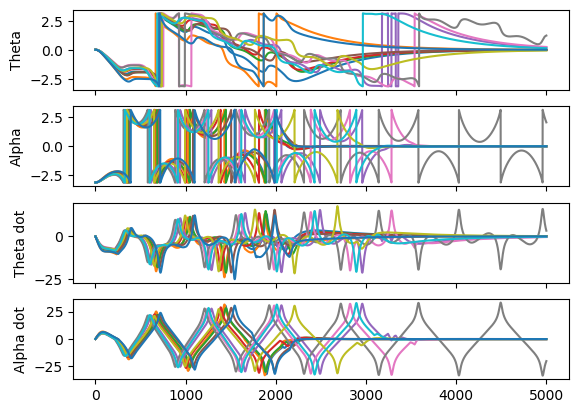

In [64]:
plot_results(hists)

In [40]:
[sh1, sh2, sh3]

3-element Array{Array{Float64,2},1}:
 [0.00529213 -3.12401 -0.0818948 0.117145; 0.00513162 -3.12382 -0.199795 0.23223; … ; 0.0276996 -0.000763584 -0.0495296 0.00136514; 0.0276502 -0.00076222 -0.0494411 0.00136271] 
 [0.00526609 -3.12399 -0.120955 0.140749; 0.00504048 -3.12376 -0.277919 0.279448; … ; 0.0109819 -0.000238523 -0.0186626 0.000405348; 0.0109632 -0.000238118 -0.018631 0.00040466]
 [0.00529018 -3.12401 -0.0848126 0.112027; 0.00512484 -3.12383 -0.205579 0.221959; … ; 0.106924 -0.00284802 -0.190107 0.00505049; 0.106734 -0.00284298 -0.18977 0.0050416]       